# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,hamming_loss,log_loss
from sklearn.model_selection import GridSearchCV

# Loading Dataset

# Train data

In [2]:
#Loading train dataset
trainDF = pd.read_csv("E:/fliprobo assignments/Malignant Comments Classifier Project/train.csv") 

In [3]:
trainDF.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
# Checking shape of the train dataset
trainDF.shape

(159571, 8)

There are 159571 rows and 8 columns in Train dataset.

In [5]:
# Getting information of the train dataset
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
# Finding the null value percentage in each of the columns in train dataset
trainDF.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

As we can see that, there is no null values present in train dataset.

# Test data

In [7]:
#Loading test dataset
testDF = pd.read_csv("E:/fliprobo assignments/Malignant Comments Classifier Project/test.csv") #Loading test dataset

In [8]:
testDF.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [9]:
# Checking shape of the test dataset
testDF.shape

(153164, 2)

There are 153164 rows and 2 columns present in Test dataset.

In [10]:
# Getting information of the test data
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [11]:
# Finding the null value percentage in each of the columns in test dataset
testDF.isnull().sum()

id              0
comment_text    0
dtype: int64

There is no null values present in test dataset.

In [12]:
for c in trainDF.drop(columns = ['id','comment_text'],axis=1):
        print(trainDF[c].value_counts())

0    144277
1     15294
Name: malignant, dtype: int64
0    157976
1      1595
Name: highly_malignant, dtype: int64
0    151122
1      8449
Name: rude, dtype: int64
0    159093
1       478
Name: threat, dtype: int64
0    151694
1      7877
Name: abuse, dtype: int64
0    158166
1      1405
Name: loathe, dtype: int64


# Data visualization

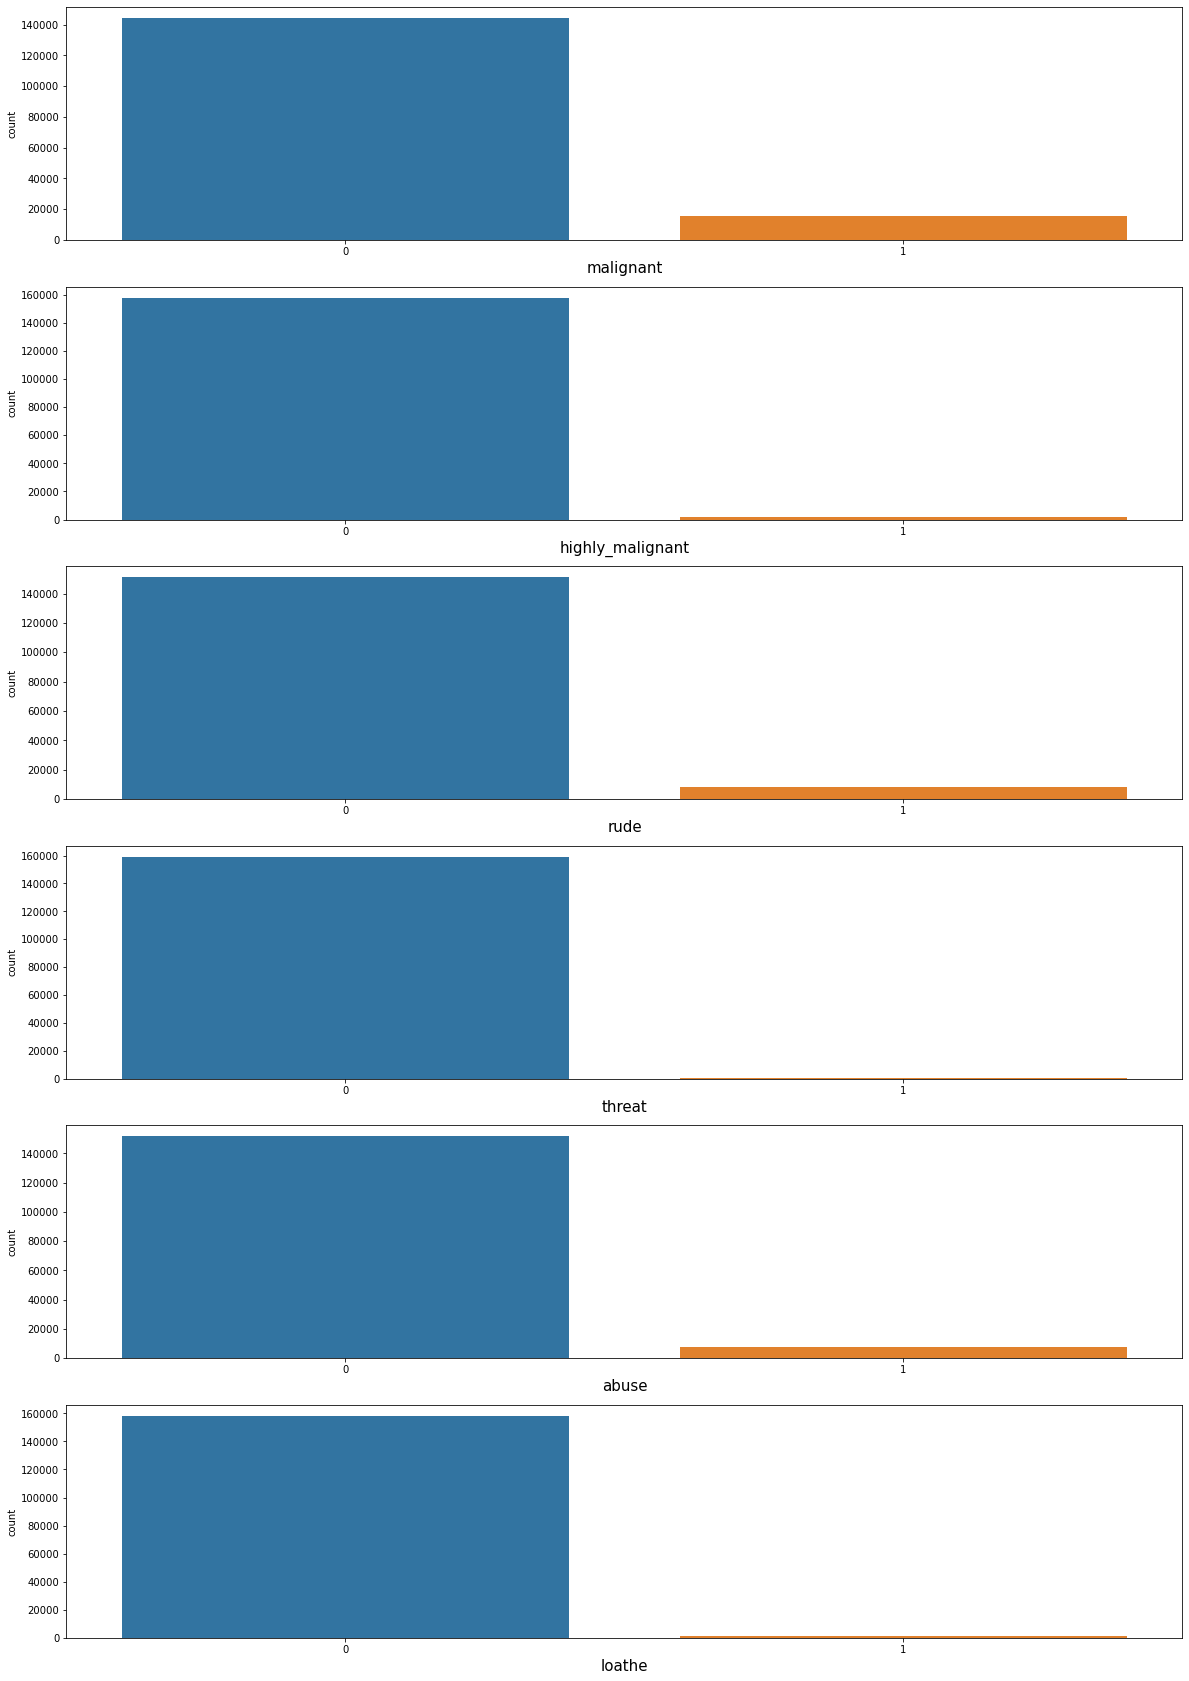

In [13]:

plt.figure(figsize=(20,30),facecolor='white')
plotnum=1
for col in trainDF.drop(columns = ['id','comment_text'],axis=1):
    if plotnum<=6:
        plt.subplot(6,1,plotnum)
        sns.countplot(trainDF[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()


In [14]:
#Creating a length column with records of total string length of each comment text
trainDF['Stringlength'] = trainDF['comment_text'].str.len()
trainDF.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Stringlength
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


<AxesSubplot:xlabel='Stringlength', ylabel='Density'>

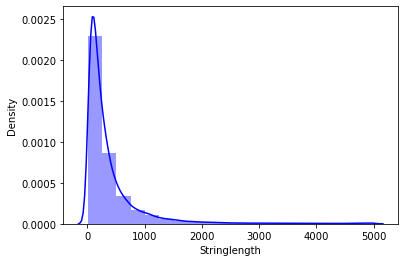

In [15]:
#Distribution of string length
sns.distplot(trainDF.Stringlength, bins=20, color = 'blue')

# Data Pre Processing

In [16]:
# Importing required libraries
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
trainDF.drop(columns='id',inplace = True)
testDF.drop(columns='id',inplace = True)

In [18]:
# Convert all messages to lower case
trainDF['comment_text'] = trainDF['comment_text'].str.lower()


trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress') # Replace email addresses with 'email'

# Replace URLs with 'webaddress'
trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')


trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'£|\$', 'dollars')# Replace money symbols with 'moneysymb' 

# Replacing 10 digit phone numbers with 'phonenumber'
trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'\d+(\.\d+)?','num') # Replace numbers with 'num'


trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'[^\w\d\s]',' ') #removing punctuations

trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'[\_]',' ') #removing underscore characters

trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'\s+[a-zA-Z]\s+', ' ') #removing single characters

trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'\s+', ' ') #removing whitespace between terms with a single space

trainDF['comment_text'] = trainDF['comment_text'].str.replace(r'^\s+|\s+?$', ' ') #removing leading and trailing whitespace


In [19]:
trainDF.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Stringlength
0,explanation why the edits made under my userna...,0,0,0,0,0,0,264
1,d aww he matches this background colour m seem...,0,0,0,0,0,0,112
2,hey man m really not trying to edit war it jus...,0,0,0,0,0,0,233
3,more can make any real suggestions on improve...,0,0,0,0,0,0,622
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,67


In [20]:
# Importing other libraries
import nltk
from nltk.corpus import stopwords,wordnet

In [21]:
from nltk.stem import WordNetLemmatizer

In [22]:
stop_words = set(stopwords.words('english') + ['u','m', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin',"u're", 'ure'])
trainDF['comment_text'] = trainDF['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [23]:
lem=WordNetLemmatizer()
trainDF['comment_text'] = trainDF['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [24]:
trainDF['Cleaned_Stringlength'] = trainDF['comment_text'].str.len()
trainDF.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Stringlength,Cleaned_Stringlength
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,164
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,83
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,67,29


<AxesSubplot:xlabel='Cleaned_Stringlength', ylabel='Density'>

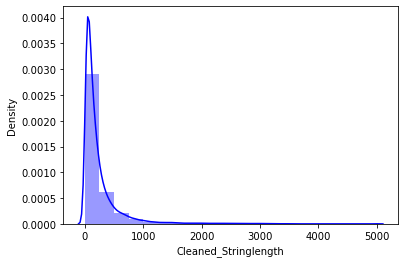

In [25]:
#Distribution of cleaned string length
sns.distplot(trainDF.Cleaned_Stringlength, bins=20, color = 'blue')

In [26]:
m = trainDF.iloc[:,1:7].sum()

<AxesSubplot:title={'center':'Malignant comment types and their Counts'}>

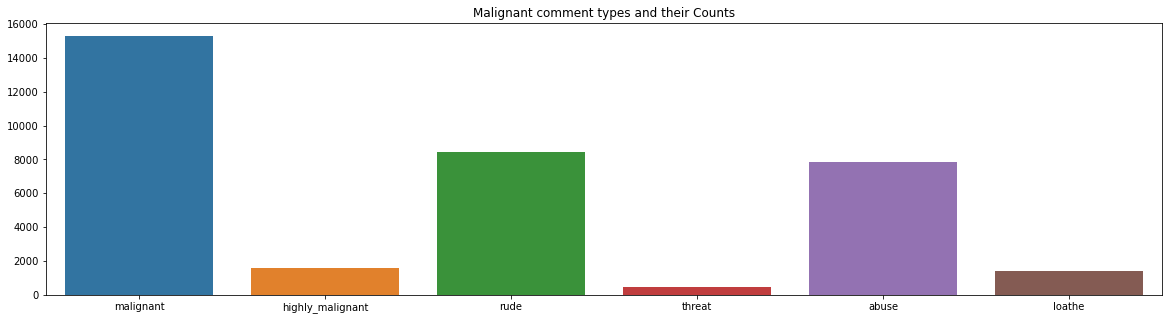

In [27]:
plt.figure(figsize=(20,5),facecolor='white')
plt.title("Malignant comment types and their Counts")
sns.barplot(m.index, m.values)

From  above graph it is clear that the malignant comments is higher in number followed by rude and abuse.

In [28]:
m

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [29]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [30]:
from wordcloud import WordCloud

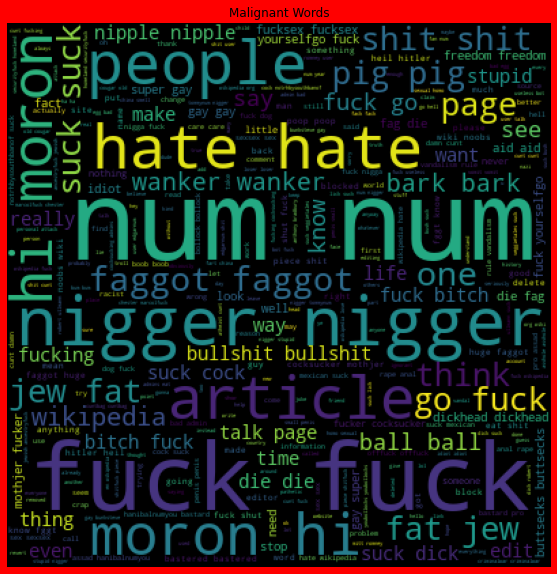

In [31]:
mal=trainDF['comment_text'][trainDF['malignant']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(mal))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Malignant Words')
plt.show()

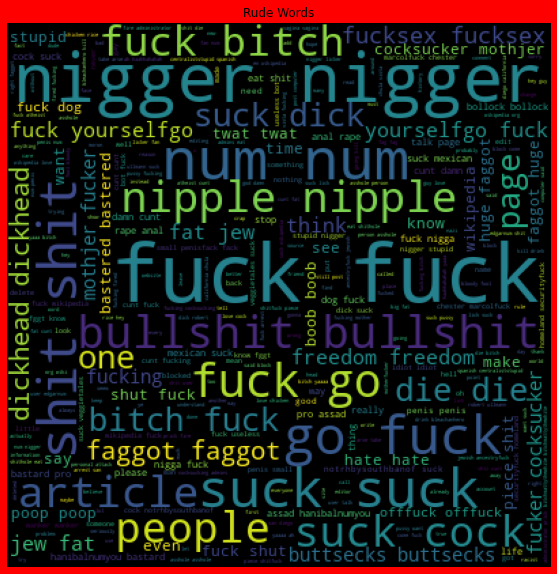

In [32]:
mal=trainDF['comment_text'][trainDF['rude']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(mal))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Rude Words')
plt.show()

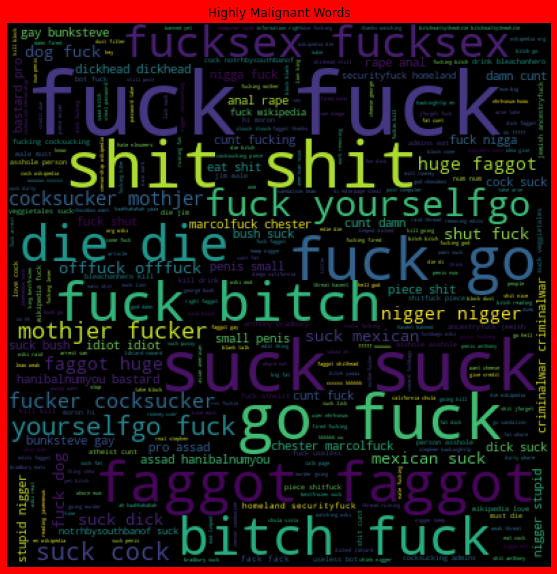

In [33]:
mal=trainDF['comment_text'][trainDF['highly_malignant']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(mal))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Highly Malignant Words')
plt.show()

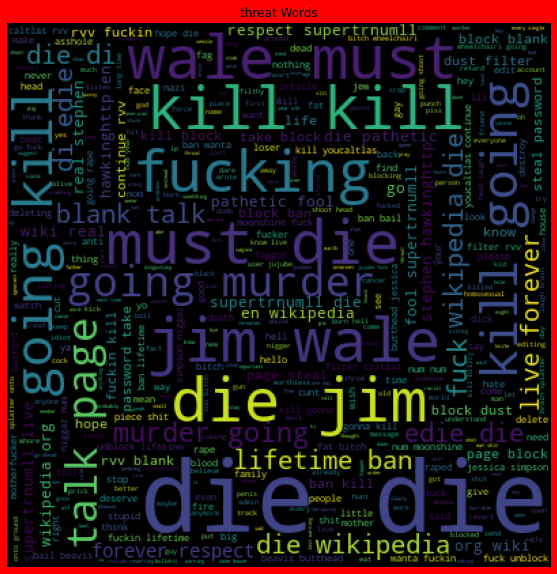

In [34]:
mal=trainDF['comment_text'][trainDF['threat']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(mal))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='threat Words')
plt.show()

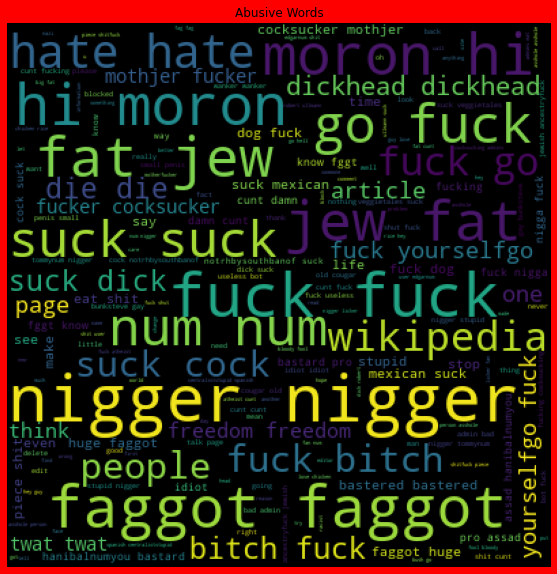

In [35]:
mal=trainDF['comment_text'][trainDF['abuse']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(mal))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Abusive Words')
plt.show()

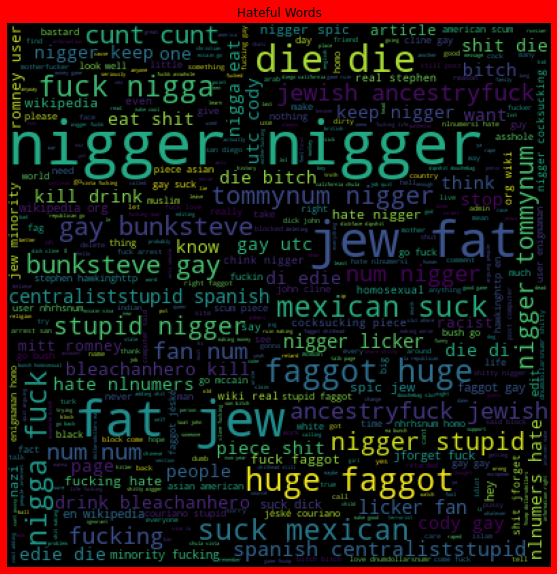

In [36]:
mal=trainDF['comment_text'][trainDF['loathe']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(mal))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Hateful Words')
plt.show()

In [37]:
# Checking correlation

m_corr=trainDF.corr()

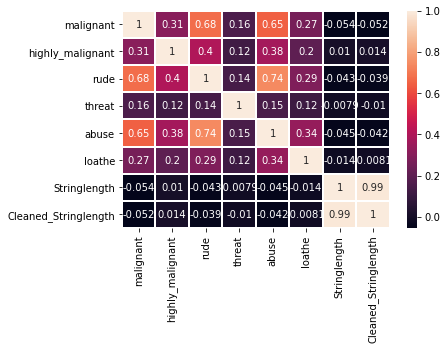

In [38]:

sns.heatmap(m_corr,annot=True,linewidth=1)
plt.show()

In [39]:
trainDF['comment_type'] = trainDF.iloc[:,1:7].sum(axis=1)

In [40]:
trainDF.comment_type.value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: comment_type, dtype: int64

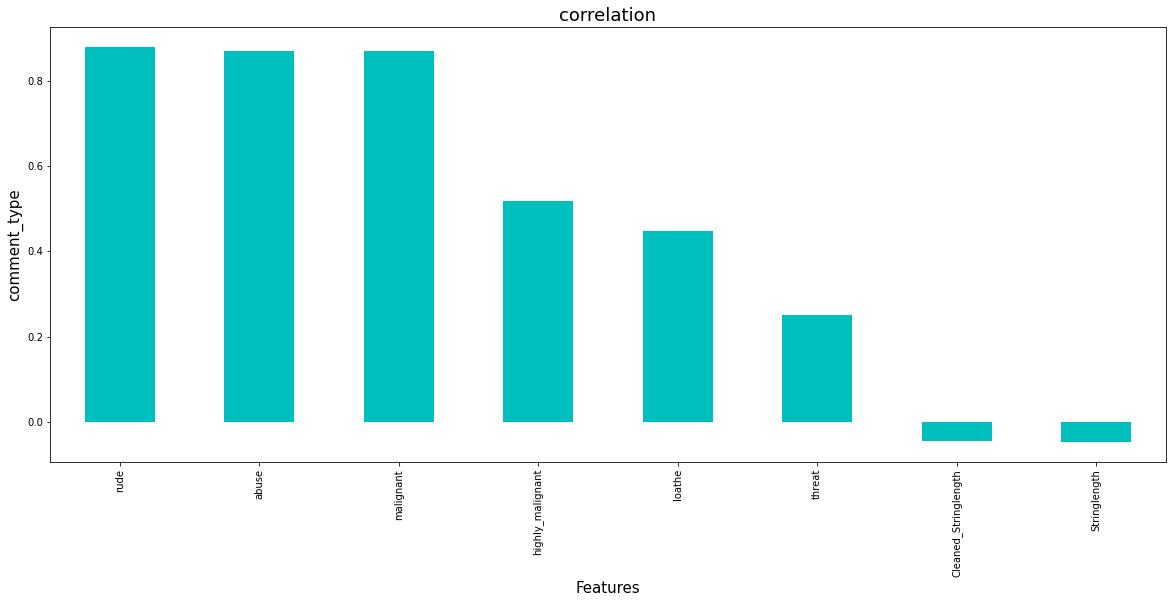

In [41]:
plt.figure(figsize = (20,8))
trainDF.corr()['comment_type'].sort_values(ascending = False).drop(['comment_type']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('comment_type',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

Rude,Abuse, Malignant have highest positive correlation with comment_type

Dropping columns 'Cleaned_Stringlength' and 'Stringlength' since they are highly correlated to each other and do not contribute to model building

In [42]:
trainDF.drop(columns=[ 'Cleaned_Stringlength','Stringlength' ],inplace = True)


In [43]:
trainDF['comment_type'] = np.where((trainDF['comment_type'] > 0), 1,0)


In [44]:
trainDF['comment_type'].value_counts()

0    143346
1     16225
Name: comment_type, dtype: int64

<AxesSubplot:xlabel='comment_type', ylabel='count'>

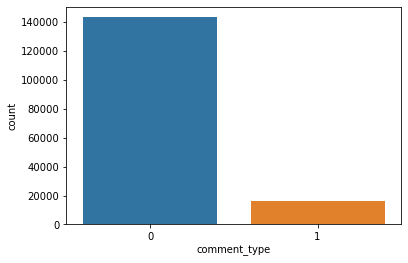

In [45]:
sns.countplot(trainDF['comment_type'])

In [46]:
print('Benign comment ratio = ',round(len(trainDF[trainDF['comment_type']==0])/len(trainDF.comment_type),2)*100,'%')

Benign comment ratio =  90.0 %


In [47]:
print('Malignant comment ratio = ',round(len(trainDF[trainDF['comment_type']==1])/len(trainDF.comment_type),2)*100,'%')

Malignant comment ratio =  10.0 %


In [48]:
from collections import Counter

In [49]:
ben = Counter(",".join(trainDF[trainDF['comment_type']==0]["comment_text"]).split()).most_common(10)
mal = Counter(",".join(trainDF[trainDF['comment_type']==1]["comment_text"]).split()).most_common(10)
Countdf=pd.DataFrame()
print("TOP 10 Malignant and Benign Words with their counts")
Countdf['Malignant Words']=mal
Countdf['Benign Words']=ben
Countdf.head(10)

TOP 10 Malignant and Benign Words with their counts


,Malignant Words,Benign Words
0,"(fuck, 9015)","(num, 132007)"
1,"(num, 7785)","(article, 69227)"
2,"(suck, 4461)","(page, 51972)"
3,"(like, 3783)","(wikipedia, 42876)"
4,"(wikipedia, 3706)","(one, 27894)"
5,"(shit, 3465)","(talk, 27848)"
6,"(nigger, 3377)","(would, 27324)"
7,"(fucking, 3129)","(please, 24957)"
8,"(go, 2865)","(like, 23870)"
9,"(as, 2838)","(source, 20303)"


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tf_vec = TfidfVectorizer(max_features=50000,smooth_idf=False, stop_words='english')

In [52]:
features = tf_vec.fit_transform(trainDF['comment_text'])

In [53]:
X = features
y=trainDF['comment_type']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Balancing out classes in Label column using SMOTE technique

In [55]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(X,y)

In [56]:
from sklearn.naive_bayes import MultinomialNB
maxAcc = 0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .30, random_state = i)
    modRF =  MultinomialNB()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9099502371872384 on random_state: 23


In [57]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .30,random_state = 56)

In [58]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import log_loss

In [59]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [60]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [61]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB

In [62]:
RFC = RandomForestClassifier()
XGBC= XGBClassifier()
adbc = AdaBoostClassifier()
LOGR= LogisticRegression(solver='liblinear')
MNB = MultinomialNB()
CNB = ComplementNB()

In [63]:
pc= PassiveAggressiveClassifier()

# Training the Models

In [64]:
RFC.fit(x_train,y_train)
XGBC.fit(x_train,y_train)
adbc.fit(x_train,y_train)
LOGR.fit(x_train,y_train)
MNB.fit(x_train,y_train)
CNB.fit(x_train,y_train)

ComplementNB()

In [65]:
pc.fit(x_train,y_train)

PassiveAggressiveClassifier()

All Models have been trained.

# Logistic Regression Model Accuracy

In [66]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)

In [67]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[39439,  3734],
       [ 2141, 40694]], dtype=int64)

In [68]:
print(accu)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     43173
           1       0.92      0.95      0.93     42835

    accuracy                           0.93     86008
   macro avg       0.93      0.93      0.93     86008
weighted avg       0.93      0.93      0.93     86008



In [69]:
loss = log_loss(y_test,LOGRpred)
print('Log loss : ', loss)

Log loss :  2.3592956122326374


# Random Forest Classifier Model Accuracy

In [70]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [71]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[41761,  1412],
       [  313, 42522]], dtype=int64)

In [72]:
print(accu)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     43173
           1       0.97      0.99      0.98     42835

    accuracy                           0.98     86008
   macro avg       0.98      0.98      0.98     86008
weighted avg       0.98      0.98      0.98     86008



In [73]:
loss = log_loss(y_test,RFCpred)
print('Log loss : ', loss)

Log loss :  0.6927322843548558


# Multinomial Naive Bayes Model Accuracy

In [74]:
MNBpred = MNB.predict(x_test)
accu = classification_report(y_test,MNBpred)

In [75]:
conf_matrx = confusion_matrix(y_test,MNBpred)

In [76]:
conf_matrx

array([[39071,  4102],
       [ 3863, 38972]], dtype=int64)

In [77]:
print(accu)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     43173
           1       0.90      0.91      0.91     42835

    accuracy                           0.91     86008
   macro avg       0.91      0.91      0.91     86008
weighted avg       0.91      0.91      0.91     86008



In [78]:
loss = log_loss(y_test,MNBpred)
print('Log loss : ', loss)

Log loss :  3.198593548671313


# Complement Naive Bayes Model Accuracy

In [79]:
CNBpred = CNB.predict(x_test)
accu = classification_report(y_test,CNBpred)

In [80]:
conf_matrx = confusion_matrix(y_test,CNBpred)

In [81]:
conf_matrx

array([[39132,  4041],
       [ 3976, 38859]], dtype=int64)

In [82]:
print(accu)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     43173
           1       0.91      0.91      0.91     42835

    accuracy                           0.91     86008
   macro avg       0.91      0.91      0.91     86008
weighted avg       0.91      0.91      0.91     86008



In [83]:
loss = log_loss(y_test,CNBpred)
print('Log loss : ', loss)

Log loss :  3.2194749503675752


# Passive Aggressive Classifier Model Accuracy

In [84]:
pcpred = pc.predict(x_test)
accu = classification_report(y_test,pcpred)

In [85]:
conf_matrx = confusion_matrix(y_test,pcpred)

In [86]:
conf_matrx

array([[39521,  3652],
       [  451, 42384]], dtype=int64)

In [87]:
print(accu)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     43173
           1       0.92      0.99      0.95     42835

    accuracy                           0.95     86008
   macro avg       0.95      0.95      0.95     86008
weighted avg       0.95      0.95      0.95     86008



In [88]:
loss = log_loss(y_test,pcpred)
print('Log loss : ', loss)

Log loss :  1.6477016054103535


# XGB Classifier Model Accuracy

In [89]:
XGBCpred = XGBC.predict(x_test)
accu = classification_report(y_test,XGBCpred)

In [90]:
conf_matrx = confusion_matrix(y_test,XGBCpred)
conf_matrx

array([[41679,  1494],
       [ 6336, 36499]], dtype=int64)

In [91]:
print(accu)

              precision    recall  f1-score   support

           0       0.87      0.97      0.91     43173
           1       0.96      0.85      0.90     42835

    accuracy                           0.91     86008
   macro avg       0.91      0.91      0.91     86008
weighted avg       0.91      0.91      0.91     86008



In [92]:
loss = log_loss(y_test,XGBCpred)
print('Log loss : ', loss)

Log loss :  3.1443564990548714


# AdaBoost Classifier Model Accuracy

In [93]:
adbcpred = adbc.predict(x_test)
accu = classification_report(y_test,adbcpred)

In [94]:
conf_matrx = confusion_matrix(y_test,adbcpred)
conf_matrx

array([[30900, 12273],
       [ 4699, 38136]], dtype=int64)

In [95]:
print(accu)

              precision    recall  f1-score   support

           0       0.87      0.72      0.78     43173
           1       0.76      0.89      0.82     42835

    accuracy                           0.80     86008
   macro avg       0.81      0.80      0.80     86008
weighted avg       0.81      0.80      0.80     86008



In [96]:
loss = log_loss(y_test,XGBCpred)
print('Log loss : ', loss)

Log loss :  3.1443564990548714


# Model Cross Validation

In [97]:
from sklearn.model_selection import cross_val_score as cvs


# Logistic Regression

In [98]:
print(cvs(LOGR,smt_x,smt_y,cv=5).mean()) 

0.9338872807785868


# Random Forest Classifier

In [4]:
print(cvs(RFC,smt_x,smt_y,cv=5).mean())

NameError: name 'cvs' is not defined

# Multinomial Naive Bayes

In [ ]:
print(cvs(MNB,smt_x,smt_y,cv=5).mean())

# Complement Naive Bayes

In [ ]:
print(cvs(CNB,smt_x,smt_y,cv=5).mean())

# Passive Aggressive Classifier

In [ ]:
print(cvs(pc,smt_x,smt_y,cv=5).mean())

# XGB Classifier

In [ ]:
print(cvs(XGBC,smt_x,smt_y,cv=5).mean())

# Adaboost Classifier

In [ ]:
print(cvs(adbc,smt_x,smt_y,cv=5).mean())